In [ ]:
#Description: This program uses the dual moving average crossover to determine when to buy and sell stocks

In [24]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NQ=F.csv to NQ=F (1).csv


In [26]:
#Store the data
NDX = pd.read_csv('NQ=F.csv')
#Show the data
NDX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,8776.750000,8901.500000,8769.50,8891.75,8891.75,416637
1,2020-01-03,8895.500000,8907.250000,8735.25,8810.00,8810.00,599887
2,2020-01-06,8772.250000,8873.000000,8723.00,8847.50,8847.50,469514
3,2020-01-07,8853.250000,8894.750000,8825.75,8853.00,8853.00,510004
4,2020-01-08,8841.500000,8972.250000,8678.00,8944.50,8944.50,723085
...,...,...,...,...,...,...,...
1012,2024-01-09,16788.000000,16868.500000,16657.75,16830.25,16830.25,605921
1013,2024-01-10,16829.500000,16983.000000,16801.50,16945.25,16945.25,550703
1014,2024-01-11,16955.000000,17057.000000,16753.00,16966.25,16966.25,756441
1015,2024-01-12,16957.750000,17042.500000,16866.50,16969.25,16969.25,756441


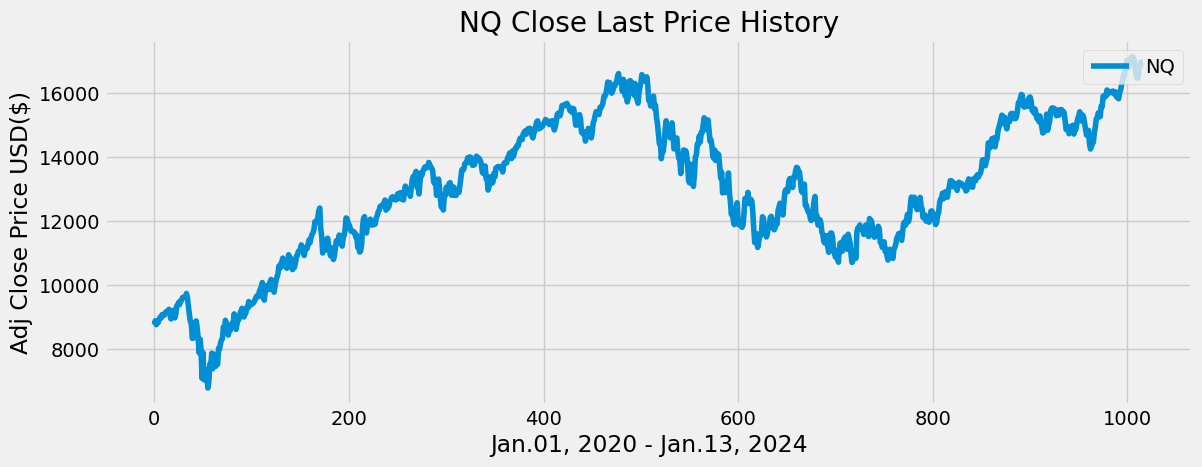

In [27]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(NDX['Open'], label = 'NQ')
plt.title('NQ Close Last Price History')
plt.xlabel('Jan.02, 2020 - Jan.15, 2024')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper right')
plt.show()

In [28]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = NDX['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1012,16494.282682
1013,16525.499349
1014,16556.107682
1015,16587.624349


In [29]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = NDX['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1012,15584.384307
1013,15606.396807
1014,15626.201807
1015,15646.309307


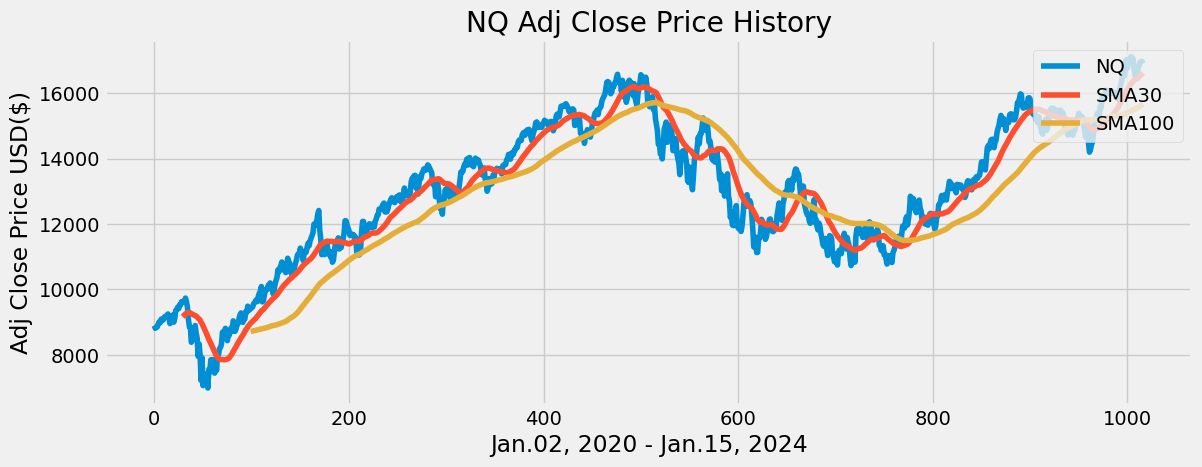

In [30]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(NDX['Adj Close'], label = 'NQ')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('NQ Adj Close Price History')
plt.xlabel('Jan.02, 2020 - Jan.15, 2024')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper right')
plt.show()

In [31]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['NDX'] = NDX["Adj Close"]
data['SMA30'] = SMA30["Adj Close"]
data['SMA100'] = SMA100["Adj Close"]
data

,NDX,SMA30,SMA100
0,8891.75,NaN,NaN
1,8810.00,NaN,NaN
2,8847.50,NaN,NaN
3,8853.00,NaN,NaN
4,8944.50,NaN,NaN
...,...,...,...
1012,16830.25,16494.282682,15584.384307
1013,16945.25,16525.499349,15606.396807
1014,16966.25,16556.107682,15626.201807
1015,16969.25,16587.624349,15646.309307


In [42]:
#Create a function to signal when to buy and sell asset
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['NDX'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data ['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['NDX'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [43]:
#Store the buy and sell data into variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [44]:
#Show the data
data

,NDX,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,8891.75,NaN,NaN,NaN,NaN
1,8810.00,NaN,NaN,NaN,NaN
2,8847.50,NaN,NaN,NaN,NaN
3,8853.00,NaN,NaN,NaN,NaN
4,8944.50,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1012,16830.25,16494.282682,15584.384307,NaN,NaN
1013,16945.25,16525.499349,15606.396807,NaN,NaN
1014,16966.25,16556.107682,15626.201807,NaN,NaN
1015,16969.25,16587.624349,15646.309307,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

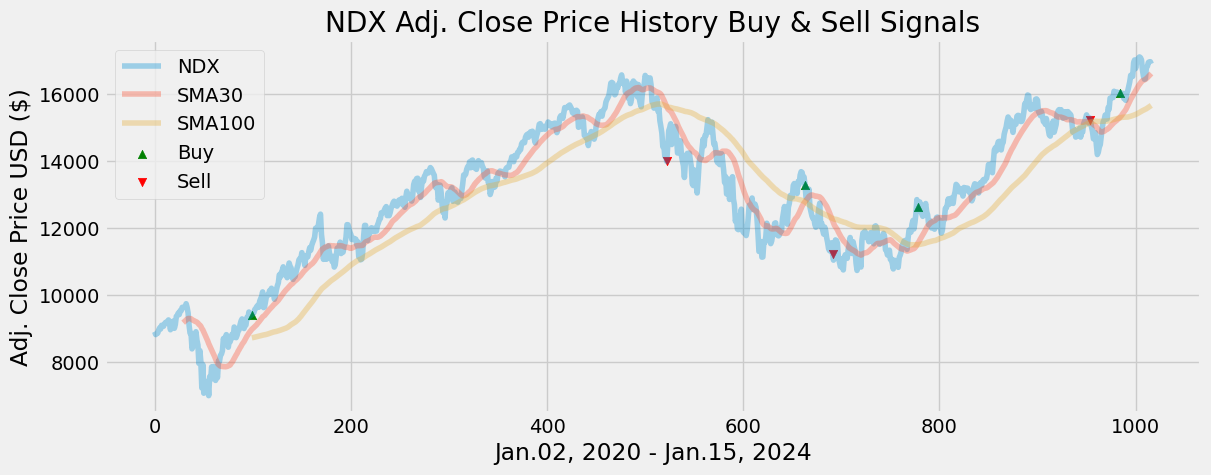

In [50]:
#Visualize the data and the strategy to buy and sell asset
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['NDX'], label = 'NDX', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color= 'red')
plt.title('NDX Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Jan.02, 2020 - Jan.15, 2024')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show